# umath tests

## General comments

Before compiling the code on the unix port, one has to produce the `axtls` library by calling 

`make axtls`

in `/micropython/ports/unix`.

# General imports

\begin{equation}
0 = \frac{\partial}{\partial a_i}\sum_j\left(\{y_j - f(a_0, a_1, ..., a_n, x_j)\}^2\right) = 
\frac{\partial}{\partial a_i}\sum_j\left(y^2_j - 2y_j\cdot f(a_0, a_1, ..., a_n, x_j) + f^2(a_1, a_2, ..., a_n, x_j)\right) = 
\end{equation}
\begin{equation}
\sum_j\left(- 2y_j\cdot \frac{\partial}{\partial a_i}f(a_0, a_1, ..., a_n, x_j) + 2f(a_0, a_1, ..., a_n, x_j)\frac{\partial}{\partial a_i}f(a_0, a_1, ..., a_n, x_j)\right) = 
2\sum_j\frac{\partial}{\partial a_i}f(a_0, a_1, ..., a_n, x_j) \cdot \{f(a_0, a_1, ..., a_n, x_j)-y_j\}
\end{equation}

\begin{equation}
0 = \sum_j\frac{\partial}{\partial a_i}f(a_0, a_1, ..., a_n, x_j) \cdot \{f(a_0, a_1, ..., a_n, x_j)-y_j\}
\end{equation}

\begin{equation}
f(a_1, a_2, ..., a_n, x_j) = \sum_{i=0}^n a_i x^i_j
\end{equation}

\begin{equation}
\frac{\partial}{\partial a_k}f(a_1, a_2, ..., a_n, x_j) = \frac{\partial}{\partial a_k}\sum_{i=0}^n a_i x^i_j = x^k_j
\end{equation}

\begin{equation}
0 = \sum_j x^i_j \cdot \{f(a_0, a_1, ..., a_n, x_j)-y_i\}
= \sum_{j=0}^n x^i_j \cdot \left\{\sum_{k=0}^n a_k x^k_i-y_i\right\}
\end{equation}

In [1]:
%pylab inline

from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic, Magics, magics_class, cell_magic

Populating the interactive namespace from numpy and matplotlib


\begin{equation}
\frac{1}{n}\sum_i^n (x_i-\bar{x})^2 = 
\frac{1}{n}\sum_i^n x^2_i -2x_i\bar{x} + \bar{x}^2= 
\frac{1}{n}\sum_i^n x^2_i - \bar{x}^2
\end{equation}

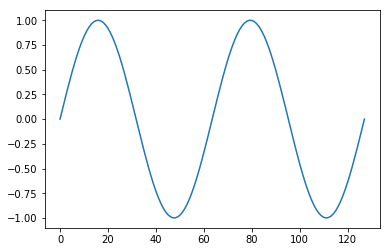

In [39]:
plot(b)

In [41]:
a = linspace(0, 2*pi, 128)
b = sin(a)
real(fft.fft(b)), imag(fft.fft(b))
# plot(abs(fft.fft(b)))
# xlim((0, 10))

(array([-2.91433544e-16,  1.56431722e+00, -3.31505794e-02, -2.78784933e-02,
        -2.64085428e-02, -2.57793983e-02, -2.54500488e-02, -2.52555013e-02,
        -2.51308205e-02, -2.50460529e-02, -2.49857735e-02, -2.49413644e-02,
        -2.49076977e-02, -2.48815645e-02, -2.48608721e-02, -2.48442084e-02,
        -2.48305917e-02, -2.48193226e-02, -2.48098918e-02, -2.48019210e-02,
        -2.47951248e-02, -2.47892842e-02, -2.47842292e-02, -2.47798261e-02,
        -2.47759684e-02, -2.47725708e-02, -2.47695639e-02, -2.47668911e-02,
        -2.47645057e-02, -2.47623691e-02, -2.47604487e-02, -2.47587175e-02,
        -2.47571524e-02, -2.47557339e-02, -2.47544453e-02, -2.47532722e-02,
        -2.47522023e-02, -2.47512249e-02, -2.47503308e-02, -2.47495119e-02,
        -2.47487610e-02, -2.47480720e-02, -2.47474394e-02, -2.47468585e-02,
        -2.47463250e-02, -2.47458351e-02, -2.47453855e-02, -2.47449733e-02,
        -2.47445959e-02, -2.47442508e-02, -2.47439362e-02, -2.47436500e-02,
        -2.4

## cell magic for running code directly on the board

The following magic lets the user, first, execute code on the microcontroller itself, and, second, capture data printed by the microcontroller. The data should have the form
```
data11 data12 data13 ... data1n
data21 data22 data23 ... data2n
.
.
.
datam1 datam2 datam3 ... datamn
```
in which case, an array of the appropriate size will be returned by the cell magic. The data can then be used by assigning `_` to a variable.

In [210]:
def string_to_matrix(string):
    matrix = []
    string = string.replace("array(\'d\', ", '').replace(')', '').replace('[', '').replace(']', '')
    for _str in string.split('\r\n'):
        if len(_str) > 0:
            matrix.append([float(n) for n in _str.split(',')])
    return array(matrix)

In [6]:
@register_cell_magic
def pyboard(line, cell):
    if len(line) != 0: 
        if line in ('skip'): 
            print('skipped pyboard execution')
            return
        spaces = "    "
        try:
            with open(line, 'w') as fout:
                fout.write(cell.replace('\t', spaces))
        except:
            print('Failed to write to disc!')
        return
    else:
        message = pyb.exec(cell)
        if len(message) == 0:
            return print('pyboard >>>')
        else:
            return print(message.decode("utf-8"))

In [ ]:
def time_cell_execution(cell, n=1000):
    pyb.exec('import utime')
    pyb.exec('t = utime.ticks_us()')
    # empty loop, to measure the function call overhead
    pyb.exec('for i in range(n): pass')
    pyb.exec('delta1 = utime.ticks_diff(utime.ticks_us(), t)')
    pyb.exec('t = utime.ticks_us()')
    pyb.exec('for i in range(n):'
        result = f(*args, **kwargs)
    delta2 = utime.ticks_diff(utime.ticks_us(), t)
    print('{}() execution time, {} cycles = {:6.3f}ms'.format(func_name, n, (delta2-delta1)/n))

In [189]:
@magics_class
class PyboardMagic(Magics):
    @cell_magic
    @magic_arguments.magic_arguments()
    @magic_arguments.argument('-data')
    @magic_arguments.argument('-file')
    @magic_arguments.argument('-skip')
    @magic_arguments.argument('-time')
    @magic_arguments.argument('-memory')    
    def pyboard(self, line='', cell=None):
        args = magic_arguments.parse_argstring(self.pyboard, line)
        if args.skip is not None:
            print('skipped execution')
            return None # do not parse the rest
        if args.file:
            spaces = "    "
            try:
                with open(args.file, 'w') as fout:
                    fout.write(cell.replace('\t', spaces))
                    printf('written cell to {}'.format(args.file))
            except:
                print('Failed to write to disc!')
            return None # do not parse the rest
        if args.data:
            message = pyb.exec(cell)
            if len(message) == 0:
                print('pyboard >>>')
            else:
                print(message.decode('utf-8'))
                # register new variable in user namespace
                self.shell.user_ns[args.data] = string_to_matrix(message.decode("utf-8"))
        
        if args.time:
            pyb.exec('import utime')
            message = pyb.exec('t = utime.ticks_us()\n' + cell + '\ndelta = utime.ticks_diff(utime.ticks_us(), t)' + 
                               "\nprint('execution time: {:d} us'.format(delta))")
            print(message.decode('utf-8'))
        
        if args.memory:
            message = pyb.exec('from micropython import mem_info\nprint(mem_info())\n')
            print("memory before execution:\n========================\n", message.decode('utf-8'))
            message = pyb.exec(cell)
            print(">>> ", message.decode('utf-8'))
            message = pyb.exec('print(mem_info())')
            print("memory after execution:\n========================\n", message.decode('utf-8'))

        else:
            message = pyb.exec(cell)
            print(message.decode('utf-8'))

ip = get_ipython()
ip.register_magics(PyboardMagic)

# pyboard initialisation

In [648]:
!ls /dev/ttyA*

/dev/ttyACM0


In [650]:
import pyboard
pyb = pyboard.Pyboard('/dev/ttyACM0')
pyb.enter_raw_repl()

In [656]:
pyb.exit_raw_repl()
pyb.close()

SerialException: Attempting to use a port that is not open

# Speed tests

## linspace

In [495]:
%%pyboard

from ulab import linspace

# this is the naive implementation of linspace
def py_linspace(start, end, n):
    q = (end-start)/n
    return [start+i*q for i in range(n)]

In [496]:
%%pyboard -time 1

a = py_linspace(0, 10, 128)

execution time: 1475 us




In [497]:
%%pyboard -time 1

a = linspace(0, 10, 128)

execution time: 284 us




## zeros, ones

We can't gain too much here, since this is really just an assignment, without actual computation. In fact, the pythonic implementation is faster by a factor of 2.5.

In [498]:
%%pyboard

from ulab import ones, zeros

### zeros

In [499]:
%%pyboard

from ulab import zeros, ones

In [500]:
%%pyboard -time 1

# pythonic implementation of zeros(128)
a = [0.0]*128

execution time: 68 us




In [501]:
%%pyboard -time 1

a = zeros(128)

execution time: 77 us




### ones

In [502]:
%%pyboard -time 1

# pythonic implementation of ones(128)
a = [1.0]*128

execution time: 69 us




In [503]:
%%pyboard -time 1

a = ones(128)

execution time: 77 us




## add, multiply etc.

Here we can gain a factor of two.

In [504]:
%%pyboard

from ulab import linspace, zeros, ones, add, multiply
a = linspace(0, 10, 128)
b = ones(128)

def py_add(a, b):
    return [a[i]+b[i] for i in range(len(a))]

def py_multiply(a, b):
    return [a[i]*b[i] for i in range(len(a))]

### add

In [505]:
%%pyboard -time 1

py_add(a, b)

execution time: 2005 us




In [507]:
%%pyboard -time 1

add(a, b)

execution time: 1086 us




### multiply

In [508]:
%%pyboard -time 1

py_multiply(a, b)

execution time: 2008 us




In [509]:
%%pyboard -time 1

multiply(a, b)

execution time: 1092 us




## Timing function

The following decorator should measure the execution time of `n` function calls. We insert an empty loop, too, so that we can subtract the overhead of calling `for`.

In [ ]:
%%pyboard

import utime

def timeit(n=1000):
    def wrapper(f, *args, **kwargs):
        func_name = str(f).split(' ')[1]
        def new_func(*args, **kwargs):
            t = utime.ticks_us()
            # empty loop, to measure the function call overhead
            for i in range(n):
                pass
            delta1 = utime.ticks_diff(utime.ticks_us(), t)
            t = utime.ticks_us()
            for i in range(n):
                result = f(*args, **kwargs)
            delta2 = utime.ticks_diff(utime.ticks_us(), t)
            print('{}() execution time, {} cycles = {:6.3f}ms'.format(func_name, n, (delta2-delta1)/n))
            return result
        return new_func
    return timeit

## sum

In [510]:
def sum(data):
    _sum = 0
    for datum in data:
        _sum += datum
    return _sum

## mean, std

In [511]:
%%pyboard

from ulab import mean, std, linspace

a = linspace(0, 10, 128)

### mean

In [512]:
%%pyboard

def py_mean(data):
    return sum(data)/len(data)

In [513]:
%%pyboard -time 1

py_mean(a)

execution time: 869 us




In [514]:
%%pyboard -time 1

mean(a)

execution time: 435 us




### std

In [515]:
%%pyboard


from math import sqrt

def py_std(data):
    _sq_sum = 0
    _mean = mean(data)
    for datum in data:
        _sq_sum += datum**2
    _sq_sum /= len(data)
    return sqrt(_sq_sum-_mean**2)

In [516]:
%%pyboard -time 1

py_std(a)

execution time: 2172 us




In [517]:
%%pyboard -time 1

std(a)

execution time: 850 us




## argmin, argmax

In [518]:
%%pyboard

from ulab import argmax, argmin, linspace

a = linspace(0, 10, 128)

In [519]:
%%pyboard

def py_argmax(data):
    idx, tmp = 0, data[0]
    for i in range(len(data)):
        if data[i] > tmp: 
            idx = i
            tmp = data[i]
    return idx

In [520]:
%%pyboard -time 1

py_argmax(a)

execution time: 2004 us




In [521]:
%%pyboard -time 1

argmax(a)

execution time: 656 us




## clip

This function is a bit questionable: the pythonic implementation can leave the type of the data alone (one simply has to define a_min/a_max in such a way that they are compatible with the type of the data array), while the C implementation returns an array of floats, irrespective of the input type. For that it is a factor of 2 faster. 

In [522]:
%%pyboard

from ulab import clip, linspace
a = linspace(0, 10, 128)

In [523]:
%%pyboard

def py_clip(data, a_min, a_max):
    for i in range(len(data)):
        data[i] = min(max(data[i], a_min), a_max)
    return data

# This second implementation is faster than the previous one
def py_clip(data, a_min, a_max):
    for i in range(len(data)):
        if data[i] > a_max: data[i] = a_max
        elif data[i] < a_min: data[i] = a_min
    return data

In [524]:
%%pyboard -time 1

py_clip(a, 2, 4)

execution time: 2137 us




In [525]:
%%pyboard -time 1

clip(a, 2, 4)

execution time: 732 us




## sin, cos, etc.

In [526]:
%%pyboard

from math import cos as mcos
from ulab import linspace, cos
a = linspace(0, 10, 128)

def py_cos(x):
    return [mcos(_x) for _x in x]

In [527]:
%%pyboard -time 1

py_cos(a)

execution time: 1589 us




In [528]:
%%pyboard -time 1

cos(a)

execution time: 1012 us




## fft

In [651]:
%%pyboard

from ulab import fft, zeros, cos, linspace, spectrum
from math import pi
import gc

# n = 512
# x = linspace(0, 16*pi, n)
# y = cos(x)
# im = zeros(n)

In [644]:
%%pyboard -time 1

fft(y, im)

execution time: 10293 us




In [652]:
%%pyboard -memory 1

import array

b = array.array('I', (0 for i in range(512)))
out = array.array('f', (0 for i in range(512)))

memory before execution:
 stack: 460 out of 15360
GC: total: 102784, used: 752, free: 102032
 No. of 1-blocks: 12, 2-blocks: 2, max blk sz: 10, max free sz: 6368
None

>>>  
memory after execution:
 stack: 460 out of 15360
GC: total: 102784, used: 5712, free: 97072
 No. of 1-blocks: 29, 2-blocks: 5, max blk sz: 128, max free sz: 6043
None



In [646]:
%%pyboard -memory 1

gc.collect()

memory before execution:
 stack: 460 out of 15360
GC: total: 102784, used: 27520, free: 75264
 No. of 1-blocks: 1037, 2-blocks: 2, max blk sz: 128, max free sz: 2517
None

>>>  
memory after execution:
 stack: 460 out of 15360
GC: total: 102784, used: 9040, free: 93744
 No. of 1-blocks: 11, 2-blocks: 3, max blk sz: 128, max free sz: 2718
None



In [653]:
%%pyboard -time 1

spectrum(b, out)

execution time: 2803 us




In [233]:
%%pyboard -memory 1

fft(y, im)

memory before execution:
 stack: 460 out of 15360
GC: total: 102784, used: 17680, free: 85104
 No. of 1-blocks: 32, 2-blocks: 4, max blk sz: 256, max free sz: 1102
None

>>>  
memory after execution:
 stack: 460 out of 15360
GC: total: 102784, used: 58816, free: 43968
 No. of 1-blocks: 2087, 2-blocks: 6, max blk sz: 256, max free sz: 839
None



In [203]:
%%pyboard -data real_part

real, _ = fft(y, im)
print(real)

array('d', [0.9999405, 1.015168, 1.063806, 1.156425, 1.317924, 1.608516, 2.208441, 3.981189, 62.6123, -3.93527, -1.783966, -1.10533, -0.7760211, -0.5833052, -0.4578487, -0.370258, -0.3060662, -0.2572737, -0.2191204, -0.1886238, -0.1637774, -0.1432322, -0.1260248, -0.1114395, -0.09896756, -0.0882128, -0.07886087, -0.07068427, -0.06348855, -0.05712152, -0.05146626, -0.04641634, -0.04189265, -0.03782628, -0.03415721, -0.03084201, -0.02783532, -0.02510341, -0.02261782, -0.02035014, -0.01827937, -0.01638965, -0.01465782, -0.01307356, -0.01162319, -0.01029374, -0.009077996, -0.007965371, -0.00694862, -0.00602074, -0.005175725, -0.004409045, -0.003716409, -0.003090441, -0.002531469, -0.002034187, -0.001594543, -0.001214385, -0.0008877516, -0.0006140471, -0.0003932118, -0.0002208948, -9.918213e-05, -2.628565e-05, -2.741814e-06, -2.634525e-05, -9.918213e-05, -0.0002208352, -0.0003932118, -0.0006142259, -0.0008877516, -0.001214743, -0.001594543, -0.002033949, -0.00253123, -0.003090441, -0.003716

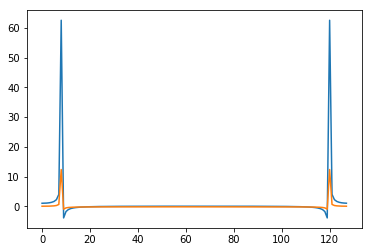

In [299]:
x = linspace(0, 16*pi, 128)
y = sin(x)

plot(real_part[0])
plot(real(fft.fft(y)))

In [301]:
argmin?

In [300]:
real(fft.fft(y))

array([ 5.10702591e-15,  3.05108805e-03,  1.28045106e-02,  3.13821882e-02,
        6.37594188e-02,  1.22034623e-01,  2.42363047e-01,  5.97727172e-01,
        1.23545207e+01, -9.89594050e-01, -5.58293662e-01, -4.22170334e-01,
       -3.56135483e-01, -3.17493816e-01, -2.92331566e-01, -2.74768612e-01,
       -2.61895653e-01, -2.52110808e-01, -2.44460850e-01, -2.38344022e-01,
       -2.33362358e-01, -2.29242577e-01, -2.25791102e-01, -2.22867191e-01,
       -2.20366215e-01, -2.18208886e-01, -2.16334109e-01, -2.14694109e-01,
       -2.13251036e-01, -2.11974555e-01, -2.10840097e-01, -2.09827577e-01,
       -2.08920431e-01, -2.08104895e-01, -2.07369450e-01, -2.06704392e-01,
       -2.06101497e-01, -2.05553759e-01, -2.05055176e-01, -2.04600588e-01,
       -2.04185533e-01, -2.03806142e-01, -2.03459049e-01, -2.03141312e-01,
       -2.02850358e-01, -2.02583925e-01, -2.02340026e-01, -2.02116907e-01,
       -2.01913022e-01, -2.01727004e-01, -2.01557645e-01, -2.01403879e-01,
       -2.01264761e-01, -